In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# ... and for the statistic
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

In [6]:
x = np.linspace(-5,5,101)
(X,Y) = np.meshgrid(x,x)
    
# To get reproducable values, I provide a seed value
np.random.seed(987654321)   

Z = -5 + 3*X-0.5*Y+np.random.randn(np.shape(X)[0], np.shape(X)[1])

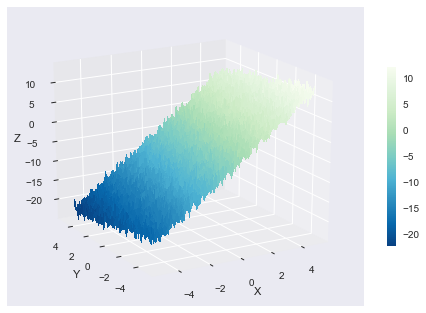

In [7]:
# Set the color
myCmap = cm.GnBu_r
    
# Plot the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z, cmap=myCmap, rstride=2, cstride=2, linewidth=0, antialiased=False)
ax.view_init(20,-120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.6)
plt.show()

In [8]:
X=X.flatten()
Y=Y.flatten()
Z=Z.flatten()

# Zadanie
Wykonaj regresję

- za pomocą from <tt>statsmodels.formula.api.ols</tt>
- za pomocą from <tt>statsmodels.formula.api.ols</tt>

Porównaj wyniki.

In [9]:
# Convert the data into a Pandas DataFrame
df = pd.DataFrame({'x':X, 'y':Y, 'z':Z})


model = ols("z ~ x + y", df).fit()

# Print the summary
print((model.summary()))

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.997e+05
Date:                Wed, 10 May 2017   Prob (F-statistic):               0.00
Time:                        11:56:23   Log-Likelihood:                -14501.
No. Observations:               10201   AIC:                         2.901e+04
Df Residuals:                   10198   BIC:                         2.903e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9975      0.010   -503.369      0.0

In [10]:
clf = linear_model.LinearRegression()
clf.fit(np.column_stack((X,Y)), Z) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(clf.coef_)
print(clf.intercept_)

[ 3.00250049 -0.50514907]
-4.99754526057


In [12]:
metrics.r2_score( Z, clf.predict( np.column_stack((X,Y)) ) )

0.98740371343716571